In [1]:
%matplotlib notebook

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import re
import calendar
import os

## Make dictionary of suggested colors for reanalysis comparison

In [139]:
dummy = """r,g,b,c,m,y,k,RGB Hexadecimal,reanalysis
    226, 31, 38,  0,86.28,83.19,11.37,  E21F26,  MERRA2
    246, 153, 153,  0,37.8,37.8,3.53,  F69999,  MERRA
    41, 95, 138,  70.29,31.16,0,45.88,  295F8A,  ERAI
    95, 152, 198,  52.02,23.23,0,22.35,  5F98C6,  ERA5
    175, 203, 227,  22.91,10.57,0,10.98,  AFCBE3,  ERA40
    114, 59, 122,  6.56,51.64,0,52.16,  723B7A,  JRA55
    173, 113, 181,  4.42,37.57,0,29.02,  AD71B5,  JRA-55C or JRA-55 AMIP
    214, 184, 218,  1.83,15.6,0,14.51,  D6B8DA,  JRA-25
    245, 126, 32,  0,48.57,86.94,3.92,  F57E20,  NCEP-R1
    253, 191, 110,  0,24.51,56.52,0.78,  FDBF6E,  NCEP-R2
    236, 0, 140,  0,100,40.68,7.45,  EC008C,  20CRv2c
    247, 153, 209,  0,38.06,15.38,3.14,  F799D1,  20CRv2
    0, 174, 239,  100,27.2,0,6.27,  00AEEF,  CERA-20C
    96, 200, 232,  58.62,13.79,0,9.02,  60C8E8,  ERA-20C
    52, 160, 72,  67.5,0,55,37.25,  34A048,  CFSR
    179, 91, 40,  0,49.16,77.65,29.8,  B35B28,  REM
    255,215,0,  0,15.69,100,0,  FFD700,  Other
    0, 0, 0,  0,0,0,100,  000000,  Obs
    119, 119, 119,  0,0,0,53.33,  777777,  Other Obs"""

reanalysis_color = {}
for line in dummy.split('\n')[1:]:
    v, k = line.split(',')[-2:]
    reanalysis_color[k.strip()] = '#'+v.strip()


## Get data

In [24]:
filepath = r'C:\Users\apbarret\Documents\data\Arctic_precip\np_reanalysis_month_comparison.csv'
df = pd.read_csv(filepath, index_col=0, parse_dates=['Date'])
df = df.dropna()
df.head()

,Date,Lat,Lon,NP,Pg,Pc,ERAI_prectot,CFSR_prectot,MERRA_prectot,MERRA2_prectot,JRA55_prectot
69,1980-01-01,77.651090,156.965000,22.0,11.1,20.8,16.181337,17.735622,17.998478,20.466927,16.106415
70,1980-02-01,77.895357,153.956488,22.0,5.5,9.7,7.366097,8.458306,7.518522,11.490108,7.683252
71,1980-03-01,78.249753,153.594198,22.0,6.8,13.3,9.585857,11.132812,8.174619,13.588425,8.141494
72,1980-04-01,78.580778,151.989833,22.0,2.0,5.7,2.645907,3.820143,7.373949,7.497791,2.491471
73,1980-05-01,79.146167,147.978611,22.0,1.4,4.8,8.435853,13.876427,17.613360,11.865479,12.269393


## Calculate bias as P_reanalysis/P_obs

In [203]:
p = re.compile('_prectot')
#these_columns = [col for col in df.columns if p.search(col)]
for col in df.columns:
    if p.search(col):
       df[col.replace('_prectot', '_bias')] = df[col]*100./df['Pc']
       #df[col.replace('_prectot', '_bias')].where(df[col.replace('_prectot', '_bias')] > 0., inplace=True)
    
df.head()

,Date,Lat,Lon,NP,Pg,Pc,ERAI_prectot,CFSR_prectot,MERRA_prectot,MERRA2_prectot,JRA55_prectot,ERAI_bias,CFSR_bias,MERRA_bias,MERRA2_bias,JRA55_bias
69,1980-01-01,77.651090,156.965000,22.0,11.1,20.8,16.181337,17.735622,17.998478,20.466927,16.106415,77.794889,85.267413,86.531144,98.398687,77.434687
70,1980-02-01,77.895357,153.956488,22.0,5.5,9.7,7.366097,8.458306,7.518522,11.490108,7.683252,75.939144,87.199031,77.510536,118.454727,79.208787
71,1980-03-01,78.249753,153.594198,22.0,6.8,13.3,9.585857,11.132812,8.174619,13.588425,8.141494,72.074113,83.705353,61.463301,102.168609,61.214241
72,1980-04-01,78.580778,151.989833,22.0,2.0,5.7,2.645907,3.820143,7.373949,7.497791,2.491471,46.419428,67.020053,129.367535,131.540198,43.710023
73,1980-05-01,79.146167,147.978611,22.0,1.4,4.8,8.435853,13.876427,17.613360,11.865479,12.269393,175.746938,289.092229,366.945000,247.197469,255.612354


In [204]:
df = df.where(df > 0.)
df[['ERAI_bias', 'MERRA_bias', 'MERRA2_bias', 'JRA55_bias', 'CFSR_bias']].min()

ERAI_bias      13.624942
MERRA_bias     13.690263
MERRA2_bias    21.150981
JRA55_bias     13.725106
CFSR_bias      14.246598
dtype: float64

In [205]:
df[df.Date.dt.month == 7]['MERRA_bias']

75      84.262775
87      57.414465
121    131.101165
126    136.854957
138    164.923656
150     95.929977
159           NaN
171     81.186576
178    177.498567
182     74.782951
201    161.169690
213    124.263167
225    109.757470
239     65.478526
251    167.800675
Name: MERRA_bias, dtype: float64

In [161]:
def setBoxColors(bp):
    
    reanalyses = ['ERAI', 'MERRA', 'MERRA2', 'JRA55', 'CFSR']

    for r, box in zip(reanalyses,bp['boxes']):
        # change outline color
        box.set( color=reanalysis_color[r], linewidth=1)
        
    for r, whisker0, whisker1 in zip(reanalyses, bp['whiskers'][0::2], bp['whiskers'][1::2]):
        whisker0.set(color=reanalysis_color[r], linewidth=2)
        whisker1.set(color=reanalysis_color[r], linewidth=2)

    for r, cap0, cap1 in zip(reanalyses, bp['caps'][0::2], bp['caps'][1::2]):
        cap0.set(color=reanalysis_color[r], linewidth=2)
        cap1.set(color=reanalysis_color[r], linewidth=2)
        
    for r, flier in zip(reanalyses, bp['fliers']):
        flier.set(marker='o', markeredgecolor=reanalysis_color[r], markersize=3)
    
    for median in bp['medians']:
        median.set(color='k', linewidth=2)
        
    return



In [304]:
def columns2list(df, column=None):
    if not column:
        column = ['ERAI_bias', 'MERRA_bias', 'MERRA2_bias', 'JRA55_bias', 'CFSR_bias']
    print (column)
    result = []
    for c in column:
        x = df[c].values
        result.append(x[~np.isnan(x)])
        
    return result

<IPython.core.display.Javascript object>


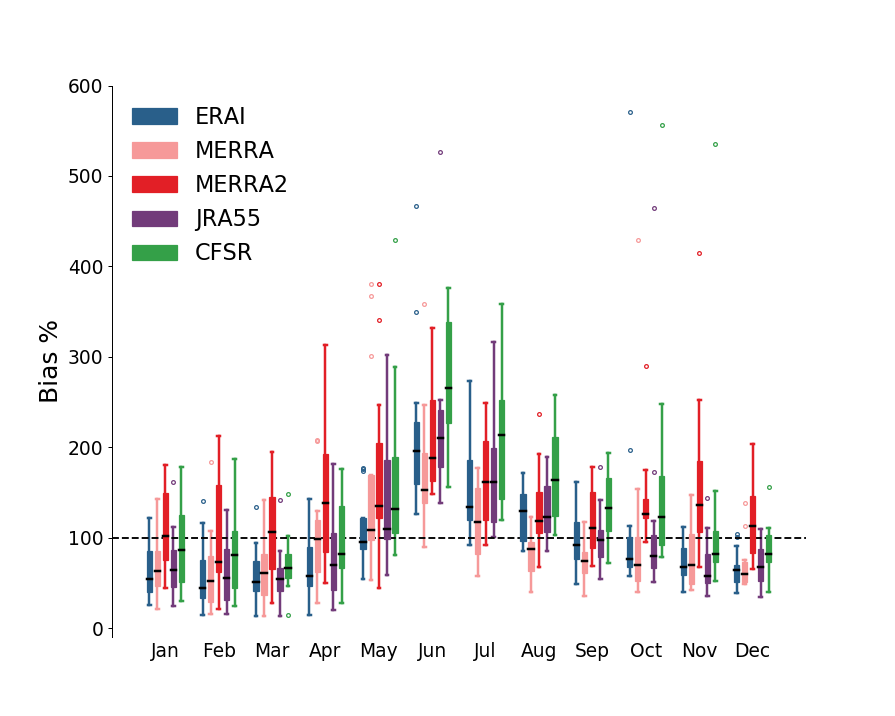

In [209]:
fig, ax = plt.subplots(figsize=(10,8))

column = ['ERAI_bias', 'MERRA_bias', 'MERRA2_bias', 'JRA55_bias', 'CFSR_bias']
labels = [c.replace('_bias','') for c in column]

for month in range(1,13):
    pos = [month+p for p in [-0.3,-0.15,0.,0.15,0.3]]
    #x = [df[df['Date'].dt.month == month][c].values for c in column]
    x = columns2list(df[df['Date'].dt.month == month])
    bp = ax.boxplot(x, positions=pos, widths=0.1, labels=None, patch_artist=True)
    setBoxColors(bp)

ax.set_ylim(-10.,600.)
ax.set_xlim(0,13)

# Hide all but left y-axis
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_xticks([])

# Format left y-axis
ax.set_ylabel('Bias %', fontsize=20)
ax.axhline(100., linestyle='--', color='k')

ax.set_xticks(range(1,13))
ax.set_xticklabels(calendar.month_abbr[1:])

ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='x', length=0)

# Create legend
handles = [mpatches.Patch(color=reanalysis_color[r], label=r) for r in labels]
ax.legend(handles=handles, fontsize=18, frameon=False)

fig.savefig(os.path.join(r'C:\Users\apbarret\Documents\Presentations\AGU2018','yang_trajectory_reanalysis_bias.png'))

In [223]:
def sampleMean(x):
    return x.sample(10, axis=0).mean(axis=0)*0.01

columns = ['ERAI_bias','MERRA_bias','MERRA2_bias','JRA55_bias','CFSR_bias']
df[columns].groupby(df.Date.dt.month).apply(sampleMean)

,ERAI_bias,MERRA_bias,MERRA2_bias,JRA55_bias,CFSR_bias
Date,,,,,
1,0.598682,0.598629,0.972133,0.616981,0.794398
2,0.509124,0.593413,0.937163,0.578566,0.769493
3,0.583668,0.631064,1.093020,0.589136,0.703195
4,0.638384,0.961349,1.472527,0.737319,0.919286
5,1.042881,1.518751,1.589659,1.375163,1.517447
6,2.225945,1.873000,2.070380,2.328631,3.141089
7,1.287624,1.035498,1.485570,1.466149,1.777564
8,1.275991,0.752328,1.385277,1.353181,1.664435
9,1.017170,0.755828,1.127862,1.063655,1.374107


In [225]:
from sklearn.model_selection import train_test_split

In [323]:
train, test = train_test_split(df, test_size=0.33)

In [324]:
correction = train[columns].groupby(train.Date.dt.month).mean()*0.01

In [325]:
correction.loc[1]

ERAI_bias      0.645975
MERRA_bias     0.651502
MERRA2_bias    1.148398
JRA55_bias     0.725324
CFSR_bias      0.925625
Name: 1, dtype: float64

In [326]:
def doCorrect(x, correction):
    columns = ['ERAI_prectot','MERRA_prectot','MERRA2_prectot','JRA55_prectot','CFSR_prectot']
    month = x.Date.dt.month.values[0]
    for c in columns:
        x[c.replace('_prectot','_corr')] = x[c]/correction[c.replace('_prectot','_bias')].loc[month]
        x[c.replace('_prectot','_corrbias')] = x[c.replace('_prectot','_corr')]*100./x['Pc']
    return x
    
result = test.groupby(test.Date.dt.month).apply(doCorrect, correction)

In [327]:
result

,Date,Lat,Lon,NP,Pg,Pc,ERAI_prectot,CFSR_prectot,MERRA_prectot,MERRA2_prectot,...,ERAI_corr,ERAI_corrbias,MERRA_corr,MERRA_corrbias,MERRA2_corr,MERRA2_corrbias,JRA55_corr,JRA55_corrbias,CFSR_corr,CFSR_corrbias
229,1990-11-01,84.457278,237.647556,30.0,0.5,3.8,3.506223,5.752460,4.161959,9.600878,...,4.939336,129.982526,5.608552,147.593485,6.291006,165.552779,8.523328,224.298095,4.769838,125.522047
134,1982-03-01,81.284368,164.895977,25.0,3.9,9.4,5.428150,8.311910,7.141147,12.375418,...,8.842732,94.071614,11.311585,120.336008,11.191613,119.059718,10.321974,109.808234,12.242347,130.237737
153,1983-10-01,85.728596,219.265526,25.0,16.6,32.5,22.214882,25.417803,17.650217,34.470240,...,25.175504,77.463089,21.769941,66.984434,23.955548,73.709378,25.998124,79.994227,18.873185,58.071339
195,1988-01-01,74.456500,175.716611,30.0,8.3,15.9,19.281849,20.696077,22.736380,23.766132,...,29.849207,187.730861,34.898430,219.486981,20.695022,130.157370,24.521549,154.223578,22.359028,140.622814
187,1987-12-01,83.113441,112.734086,29.0,4.7,10.0,5.180763,8.082131,5.089871,6.526690,...,8.242759,82.427586,7.821765,78.217649,5.558932,55.589315,8.874286,88.742862,9.953389,99.533887
126,1981-07-01,76.587971,165.737754,25.0,18.1,23.2,46.557137,55.927620,31.750350,50.764930,...,33.317800,143.611207,25.728771,110.899876,31.588840,136.158791,37.814455,162.993341,28.053389,120.919778
87,1981-07-01,87.805484,123.403387,22.0,28.0,38.7,43.884410,46.174370,22.219398,38.982533,...,31.405110,81.150154,18.005402,46.525586,24.257159,62.679997,27.104950,70.038630,23.161142,59.847912
171,1984-07-01,81.722903,179.310430,26.0,33.0,42.5,53.239445,53.905410,34.504295,50.333122,...,38.099877,89.646769,27.960420,65.789223,31.320144,73.694456,34.681468,81.603454,27.039045,63.621282
218,1989-12-01,83.269355,204.633871,30.0,9.9,17.6,6.838073,6.979196,8.603964,12.784246,...,10.879592,61.815861,13.221981,75.124893,10.888635,61.867242,9.143457,51.951460,8.595092,48.835747
248,1990-04-01,76.251389,225.536778,31.0,2.2,6.1,8.250469,10.761417,12.667414,13.151982,...,12.806466,209.942060,13.760322,225.579052,9.257512,151.762495,14.543996,238.426172,11.460344,187.874484


In [292]:
correction.loc[1,'ERAI_bias']

0.6527242295678021

In [299]:
junk = []
for im in range(1,13):
    junk.append((df.loc[df.Date.dt.month == im, 'ERAI_prectot']*100./correction.loc[im,'ERAI_bias']/df.loc[df.Date.dt.month == im, 'Pc']).median())
    
junk = np.array(junk)
junk

array([ 82.91132662,  89.18566079,  99.01202525, 100.63690839,
        87.86666074,  87.8656094 ,  89.19415056, 108.99224894,
       102.86127958,  61.20341692,  95.49814911,  95.17865966])

<IPython.core.display.Javascript object>


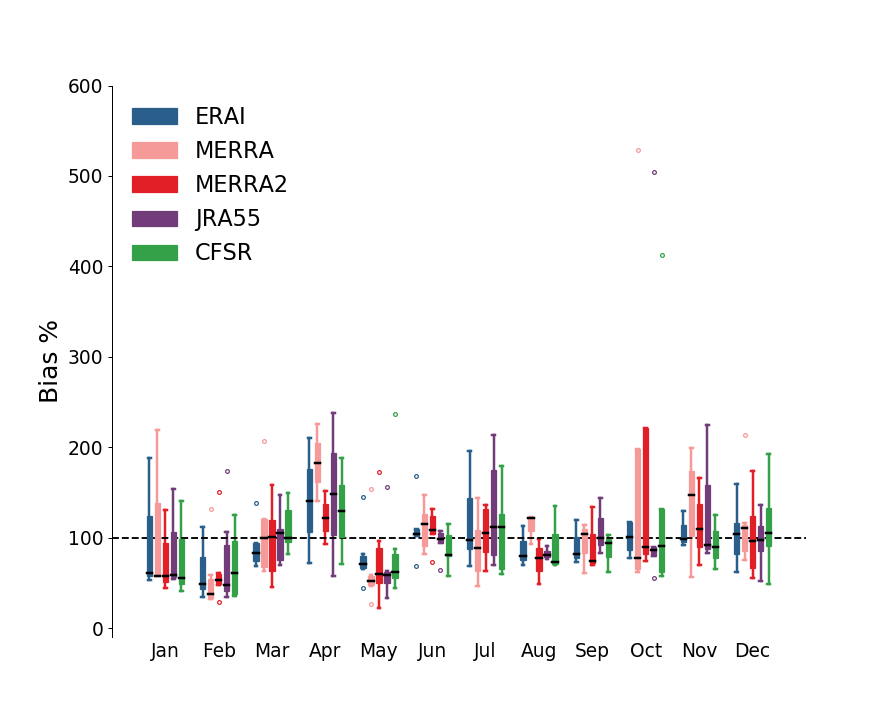

['ERAI_corrbias', 'MERRA_corrbias', 'MERRA2_corrbias', 'JRA55_corrbias', 'CFSR_corrbias']
['ERAI_corrbias', 'MERRA_corrbias', 'MERRA2_corrbias', 'JRA55_corrbias', 'CFSR_corrbias']
['ERAI_corrbias', 'MERRA_corrbias', 'MERRA2_corrbias', 'JRA55_corrbias', 'CFSR_corrbias']
['ERAI_corrbias', 'MERRA_corrbias', 'MERRA2_corrbias', 'JRA55_corrbias', 'CFSR_corrbias']
['ERAI_corrbias', 'MERRA_corrbias', 'MERRA2_corrbias', 'JRA55_corrbias', 'CFSR_corrbias']
['ERAI_corrbias', 'MERRA_corrbias', 'MERRA2_corrbias', 'JRA55_corrbias', 'CFSR_corrbias']
['ERAI_corrbias', 'MERRA_corrbias', 'MERRA2_corrbias', 'JRA55_corrbias', 'CFSR_corrbias']
['ERAI_corrbias', 'MERRA_corrbias', 'MERRA2_corrbias', 'JRA55_corrbias', 'CFSR_corrbias']
['ERAI_corrbias', 'MERRA_corrbias', 'MERRA2_corrbias', 'JRA55_corrbias', 'CFSR_corrbias']
['ERAI_corrbias', 'MERRA_corrbias', 'MERRA2_corrbias', 'JRA55_corrbias', 'CFSR_corrbias']
['ERAI_corrbias', 'MERRA_corrbias', 'MERRA2_corrbias', 'JRA55_corrbias', 'CFSR_corrbias']
['ERAI_cor

In [328]:
fig2, ax2 = plt.subplots(figsize=(10,8))

column = ['ERAI_corrbias', 'MERRA_corrbias', 'MERRA2_corrbias', 'JRA55_corrbias', 'CFSR_corrbias']
labels = [c.replace('_corrbias','') for c in column]

for month in range(1,13):
    pos = [month+p for p in [-0.3,-0.15,0.,0.15,0.3]]
    #x = [df[df['Date'].dt.month == month][c].values for c in column]
    x = columns2list(result[result['Date'].dt.month == month], column=column)
    bp = ax2.boxplot(x, positions=pos, widths=0.1, labels=None, patch_artist=True)
    setBoxColors(bp)
    #ax2.plot(month, junk[month-1], 'ko')

ax2.set_ylim(-10.,600.)
ax2.set_xlim(0,13)

# Hide all but left y-axis
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)
#ax.set_xticks([])

# Format left y-axis
ax2.set_ylabel('Bias %', fontsize=20)
ax2.axhline(100., linestyle='--', color='k')

ax2.set_xticks(range(1,13))
ax2.set_xticklabels(calendar.month_abbr[1:])

ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='x', length=0)

# Create legend
handles = [mpatches.Patch(color=reanalysis_color[r], label=r) for r in labels]
ax2.legend(handles=handles, fontsize=18, frameon=False)

fig2.savefig(os.path.join(r'C:\Users\apbarret\Documents\Presentations\AGU2018',
                          'yang_trajectory_reanalysis_corrected_bias_ensemble.png'))